In [ ]:
## Replace this with your name and Section

DS 256 Data Science Programming, Fall 2024

Prof Eatai Roth

## Problem Set 5
Due 11/14/2024 by 8p

## Titanic Pandas
(sounds cute...is not)

In this assignment, we'll explore the titanic training data set. These data represent a portion of the passenger manifest of the Titanic, detailing the passengers and whether or not they survived the fateful crash.

The columns are mostly self-explanatory. Key to less-obvious columns:
 - Sex - male=1 / female=0 
 - Parch - number of parents/children traveling with
 - SibSp - numbers of siblings/spouses traveling with
 - PClass - ticket class (like first class, business, economy)


 To start, you should import packages, ```pandas``` (as pd) and ```matplotlib.pyplot``` (as plt). Then load the data from ```titanic_train_clean.csv``` into a pandas dataframe.

 Feel free to add more code blocks if needed. When making figures, don't forget to label axes and provide titles and legends when appropriate.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


data_path = 'titanic.csv' 
df = pd.read_csv(data_path)

## Homework Problems

For each of the problems, you'll write some code to find the answer. If there is a written/short answer component, use the provided text field.

### Problem 1

 - How many passengers are recorded in this log?
 - What percentage are male?
 - What percentage survived?

Hint: You can find these three answers with a single command.

In [21]:
result = df.agg(
    total_passengers=('Survived', 'count'),
    male_percentage=('Sex', lambda x: (x.sum() / len(x)) * 100),
    survived_percentage=('Survived', lambda x: (x.sum() / len(x)) * 100)
)

print(result)


                       Survived        Sex
total_passengers     891.000000        NaN
male_percentage             NaN  64.758698
survived_percentage   38.383838        NaN


Your written answer:

 - <Answer 1> 891
 - <Answer 2> 64.76%
 - <Answer 3> 38.38%

### Problem 2:

 - What percentage of female passengers survived?
 - What percentage of male passengers survived?

In [27]:
female_survival_rate = df[df['Sex'] == 0]['Survived'].mean() * 100  # Female = 0
male_survival_rate = df[df['Sex'] == 1]['Survived'].mean() * 100  # Male = 1


print(f"Percent of female survived: {female_survival_rate:.2f}%")
print(f"Percent of male survived: {male_survival_rate:.2f}%")


Percent of female survived: 74.20%
Percent of male survived: 18.89%


Your written answer:

 - <Answer 1> 74.20%
 - <Answer 2> 18.89%

### Problem 3

Use ```groupby``` and ```agg``` to find the percentage of the total tickets and the survivorship percentage for each class of ticket.

In [29]:
ticket_class_statistics = df.groupby('Pclass').agg(
    ticket_percent=('Pclass', lambda x: (len(x) / len(df)) * 100),
    survivorship_percent=('Survived', lambda x: x.mean() * 100)
)


print(ticket_class_statistics)


        ticket_percent  survivorship_percent
Pclass                                      
1            24.242424             62.962963
2            20.650954             47.282609
3            55.106622             24.236253


Your written answer:

 - Class 1 
    - % tickets:  24.24
    - % survivorship: 62.96
- Class 2 
    - % tickets:20.65
    - % survivorship:  47.28
- Class 3
    - % tickets: 55.11
    - % survivorship:  24.24


### Problem 4

Create two new dataframes corresponding to survivors and non-survivors keeping only the columns: age, name, and sex. Display the first five rows of these new dataframes.

Create a figure showing the distribution of age by sex and survivorship (four histograms on the same axes: male-survivors, female-survivors, male-unlucky, female-unlucky). Choose colors and histtype (see the [documentation for histogram](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html)) to make this figure easy to read and interpret.

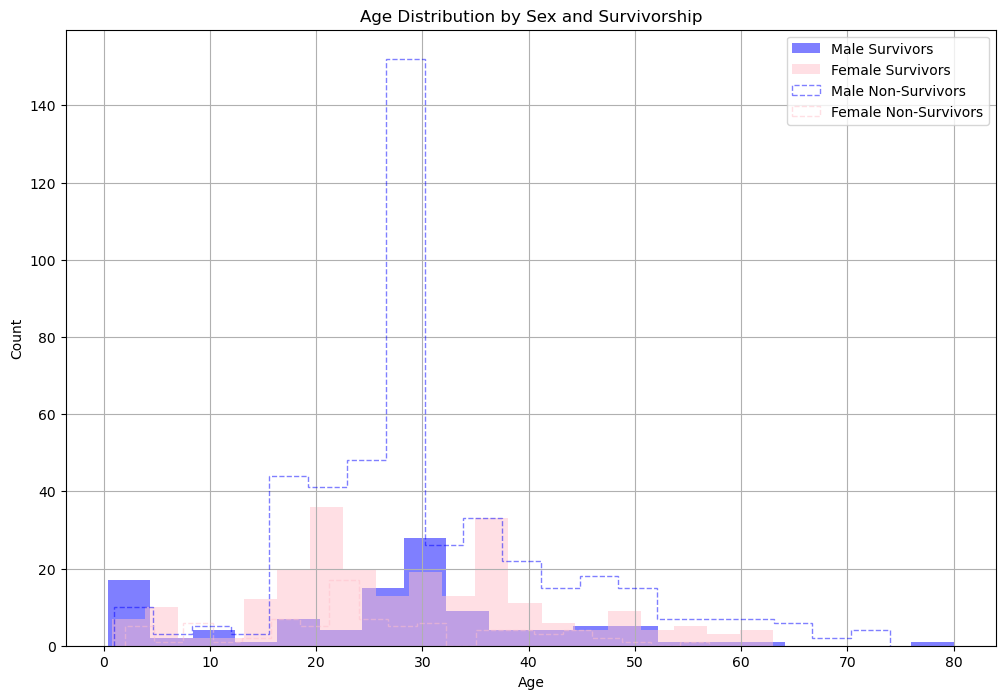

(    Age                                               Name  Sex
 1  38.0  Cumings, Mrs. John Bradley (Florence Briggs Th...    0
 2  26.0                             Heikkinen, Miss. Laina    0
 3  35.0       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0
 8  27.0  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)    0
 9  14.0                Nasser, Mrs. Nicholas (Adele Achem)    0,
     Age                            Name  Sex
 0  22.0         Braund, Mr. Owen Harris    1
 4  35.0        Allen, Mr. William Henry    1
 5  30.0                Moran, Mr. James    1
 6  54.0         McCarthy, Mr. Timothy J    1
 7   2.0  Palsson, Master. Gosta Leonard    1)

In [31]:
import matplotlib.pyplot as plt

survivors = df[df['Survived'] == 1][['Age', 'Name', 'Sex']]
non_survivors = df[df['Survived'] == 0][['Age', 'Name', 'Sex']]
survivors_head = survivors.head()
non_survivors_head = non_survivors.head()

plt.figure(figsize=(12, 8))

#M survivors
plt.hist(
    survivors[survivors['Sex'] == 1]['Age'].dropna(), 
    bins=20, alpha=0.5, label='Male Survivors', histtype='stepfilled', color='blue'
)

#F survivors
plt.hist(
    survivors[survivors['Sex'] == 0]['Age'].dropna(), 
    bins=20, alpha=0.5, label='Female Survivors', histtype='stepfilled', color='pink'
)

#M non-survivors
plt.hist(
    non_survivors[non_survivors['Sex'] == 1]['Age'].dropna(), 
    bins=20, alpha=0.5, label='Male Non-Survivors', histtype='step', color='blue', linestyle='--'
)

#F non-survivors
plt.hist(
    non_survivors[non_survivors['Sex'] == 0]['Age'].dropna(), 
    bins=20, alpha=0.5, label='Female Non-Survivors', histtype='step', color='pink', linestyle='--'
)

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution by Sex and Survivorship')
plt.legend()
plt.grid(True)
plt.show()

survivors_head, non_survivors_head

### Problem 5

Now that we've inspected the data, let's build a classifier (you'll compare two models) that predicts which passengers survived. These are the steps you should take:

 - Choose your features. The label will be survivorship.
 - Split the data into training and test sets.
 - Standardize the values using StandardScaler
 - Choose two of the following model types: KNN, SVM, Decision Tree. Create those models and select hyper-parameters.
 - Fit your models to the training data.
 - Apply the fit models to create predictions from the test data.
 - For each model, create a confusion matrix for the training and test data. You may want to revisit the hyper-parameters and re-fit the models.

 - Answer the questions at the bottom of the code block.

#### **Questions**

How does the model performance on the test data compare to the performance on the training data? 
 
 - 


Which models did you fit and which worked better?
 
 - 